1 y 2

In [2]:
import pandas as pd

df=pd.read_excel("FilesDS/calidadvino.xlsx")

df.describe()

,AcidezFija,AcidezVolatil,AcidoCitrico,AzucarResidual,Cloruros,AnhiSulfLibre,total sulfur dioxide,densidad,ph,sulfatos,alcohol,calidad
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1.599000e+03,1599.000000
mean,8.319637,3.879687,0.270976,2.538806,0.087467,15.874922,46.467792,1257.356925,3.311113,0.658149,1.455285e+12,5.636023
std,1.741096,60.015370,0.194801,1.409928,0.047065,10.460157,32.895324,9784.883345,0.154386,0.169507,3.370300e+13,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000e+00,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000e+00,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,1.020000e+01,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,1.110000e+01,6.000000
max,15.900000,1185.000000,1.000000,15.500000,0.611000,72.000000,289.000000,100369.000000,4.010000,2.000000,9.566667e+14,8.000000


3

In [10]:
#dataframe to class CalidadVino

class CalidadVino:
    def __init__(self,df):
        self.df_calidad=df
        self.df_calidad.columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']

    def getCalidadVino(self, nombreColumna):
        #return self.df_calidad[nombreColumna] lambda
        return nombreColumna + self.df_calidad[nombreColumna]

    def obtenerMedia(self, nombreColumna):
        return "Media "+ nombreColumna ,self.df_calidad[nombreColumna].mean()

    def obtenerMediana(self, nombreColumna):
        return "Mediana "+ nombreColumna, self.df_calidad[nombreColumna].median()

    def obtenerMinimo(self, nombreColumna):
        return "Minimo "+ nombreColumna, self.df_calidad[nombreColumna].min()

    def obtenerMaximo(self, nombreColumna):
        return "Maximo "+ nombreColumna, self.df_calidad[nombreColumna].max()

    def obtenerDesviacionEstandar(self):
        return self.df.std()

CalidadVino(df).obtenerMediana('fixed acidity')

('Mediana fixed acidity', 7.9)

4

In [15]:
# get quality wine 
print("Calidad de vino: ", df.quality.unique())

print("PH de vino: ",df.pH.unique())

Calidad de vino:  [5 6 7 4 8 3]
PH de vino:  [3.51 3.2  3.26 3.16 3.3  3.39 3.36 3.35 3.28 3.58 3.17 3.11 3.38 3.04
 3.52 3.43 3.34 3.47 3.46 3.45 3.4  3.42 3.23 3.5  3.33 3.21 3.48 3.9
 3.25 3.32 3.15 3.41 3.44 3.31 3.54 3.13 2.93 3.14 3.75 3.85 3.29 3.08
 3.37 3.19 3.07 3.49 3.53 3.24 3.63 3.22 3.68 2.74 3.59 3.   3.12 3.57
 3.61 3.06 3.6  3.69 3.1  3.05 3.67 3.27 3.18 3.02 3.55 2.99 3.01 3.56
 3.03 3.62 2.88 2.95 2.98 3.09 2.86 3.74 2.92 3.72 2.87 2.89 2.94 3.66
 3.71 3.78 3.7  4.01 2.9 ]


5

In [42]:
#groupby quality
#add title to groupby
print(df.groupby('quality').apply(lambda x: x['quality'].count()))


quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64


5

In [51]:
#group by quality and pH
print(df.groupby(['quality', 'pH']).agg({'quality': 'sum'}))

              quality
quality pH           
3       3.16        3
        3.25        3
        3.31        3
        3.32        3
        3.38        3
...               ...
8       3.35       16
        3.46        8
        3.50        8
        3.56        8
        3.72        8

[270 rows x 1 columns]


6

<Axes: xlabel='pH'>

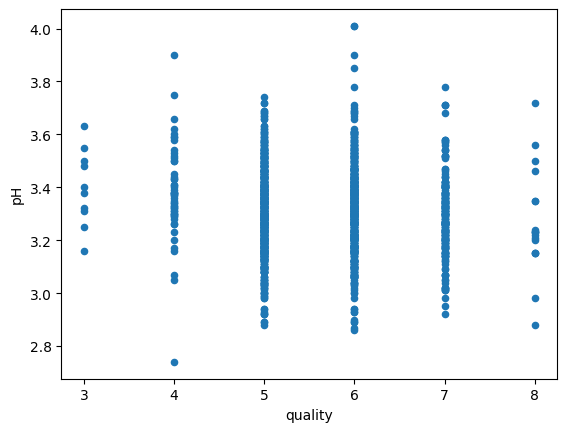

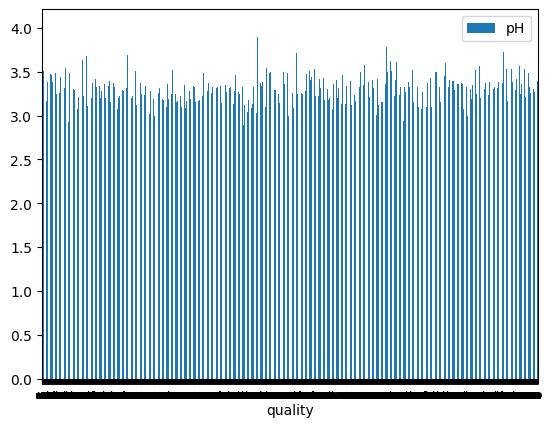

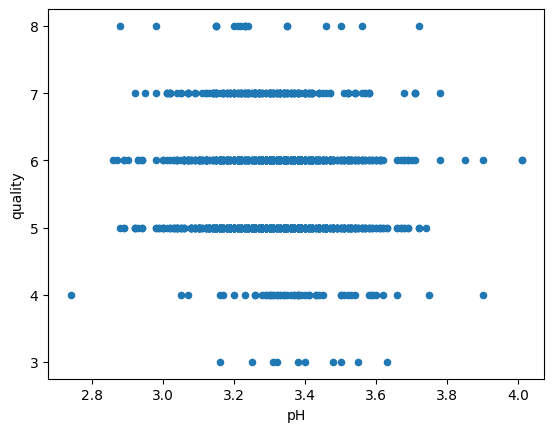

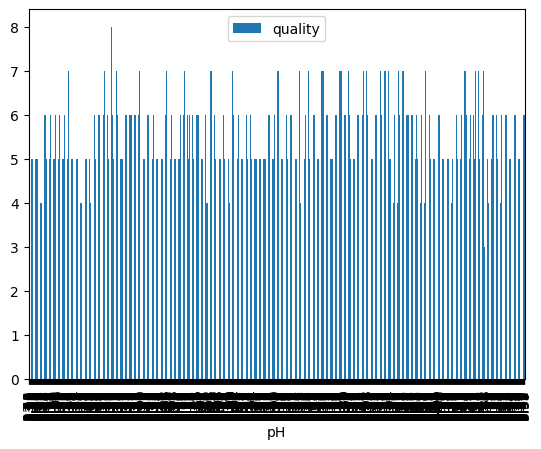

In [55]:
# plot quality versus pH scatter
import matplotlib.pyplot as plt

df.plot(kind='scatter', x='quality', y='pH')

df.plot(kind='bar', x='quality', y='pH')

df.plot(kind='scatter', x='pH', y='quality')

df.plot(kind='bar', x='pH', y='quality')

7

<Axes: xlabel='fixed acidity'>

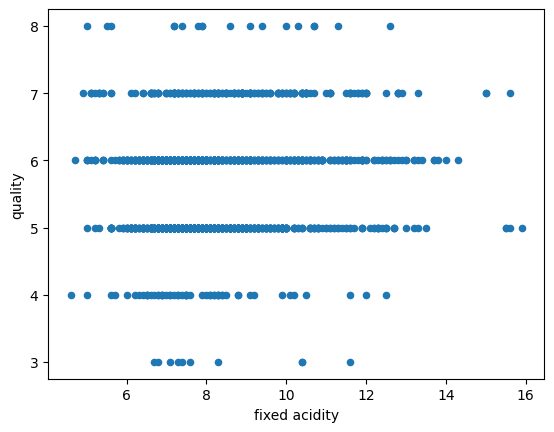

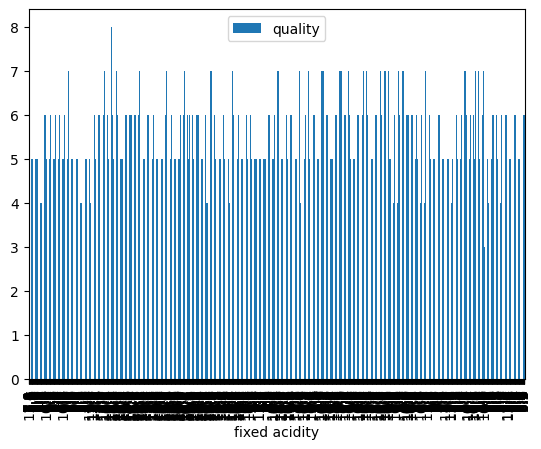

In [56]:

df.plot(kind='scatter', x='fixed acidity', y='quality')

df.plot(kind='bar', x='fixed acidity', y='quality')

8 y 9

In [75]:
#Liste los valores distintos de ph solo para los vinos de maxima calidad

print(df.groupby('pH')['quality'].apply(lambda x: x.max()))

pH
2.74    4
2.86    6
2.87    6
2.88    8
2.89    6
       ..
3.75    4
3.78    7
3.85    6
3.90    6
4.01    6
Name: quality, Length: 89, dtype: int64


9

In [78]:
print(df.groupby('pH').apply(lambda x: x['quality'].min()))

pH
2.74    4
2.86    6
2.87    6
2.88    5
2.89    5
       ..
3.75    4
3.78    6
3.85    6
3.90    4
4.01    6
Length: 89, dtype: int64
